In [9]:
#!pip uninstall numpy -y   # numpy==1.26.4
!pip install numpy==1.26.4

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.1 MB/s eta 0:00:0000:0100:01


In [5]:
import psutil

# CPU Usage
cpu_percent = psutil.cpu_percent(interval=1)
print(f"CPU Usage: {cpu_percent}%")

# Memory Usage
memory_info = psutil.virtual_memory()
print(f"Memory Usage: {memory_info.percent}%")
print(f"Total Memory: {memory_info.total / (1024 ** 3):.2f} GB")
print(f"Used Memory: {memory_info.used / (1024 ** 3):.2f} GB")


CPU Usage: 11.9%
Memory Usage: 5.0%
Total Memory: 251.51 GB
Used Memory: 10.43 GB


In [6]:
!nvidia-smi

Sat Dec 28 08:16:14 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Quadro RTX 6000                On  |   00000000:3B:00.0 Off |                    0 |
| N/A   59C    P0            220W /  250W |   21235MiB /  23040MiB |     99%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### The gpu is almost 99% being utilized.

In [1]:
pip install tensorflow==2.11 keras==2.11 numpy scikit-learn opencv-python pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imgaug

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
np.__version__

'1.26.4'

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib. image as mpimg
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
pd.set_option('display.max_colwidth',None)

In [9]:
import tensorflow as tf
import keras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


TensorFlow version: 2.11.0
Keras version: 2.11.0


In [10]:
# Defining the directory and columns for data.
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
data.head()

center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.649786  
1       0.0       0.0      0.0  0.627942  
2       0.0       0.0      0.0  0.622910  
3       0.0       0.0      0.0  0.619162  
4       0.0       0.0      0.0  0.615438

In [11]:
# taking the currect dir as the path, removing all the sub directory.
def path_leaf(path) :
  head, tail = ntpath.split(path)
  return tail

data['center'] = data[ 'center'].apply(path_leaf)
data['left'] = data[ 'left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data. head( )

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg       0.0       0.0      0.0  0.649786  
1  right_2018_07_16_17_11_43_670.jpg       0.0       0.0      0.0  0.627942  
2  right_2018_07_16_17_11_43_724.jpg       0.0       0.0      0.0  0.622910  
3  right_2018_07_16_17_11_43_792.jpg       0.0       0.0      0.0  0.619162  
4  right_2018_07_16_17_11_43_860.jpg       0.0       0.0      0.0  0.615438

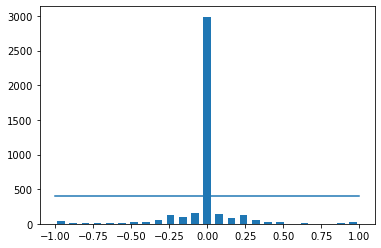

In [12]:
# To handle the bias, just removing excess of 0 valuded data from the steering angle.
num_bins = 25
thresh_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[: -1]+ bins [1:]) * 0.5
plt.bar (center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (thresh_bin, thresh_bin))

In [13]:
data.shape

(4053, 7)

In [14]:
# function to remove excess 0 valued data to handle the biasness.
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[thresh_bin:]
    remove_list.extend (list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


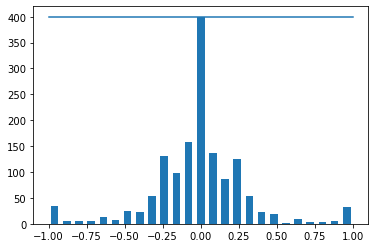

In [15]:
# rechecking the histogram
hist, _ = np.histogram(data['steering'], num_bins)
plt.bar (center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (thresh_bin, thresh_bin))

In [16]:
data.shape

(1463, 7)

In [17]:
data.reset_index(drop=True, inplace=True)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
2  center_2018_07_16_17_11_44_342.jpg  left_2018_07_16_17_11_44_342.jpg   
3  center_2018_07_16_17_11_44_413.jpg  left_2018_07_16_17_11_44_413.jpg   
4  center_2018_07_16_17_11_44_485.jpg  left_2018_07_16_17_11_44_485.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg      0.00  0.000000      0.0  0.649786  
1  right_2018_07_16_17_11_43_792.jpg      0.00  0.000000      0.0  0.619162  
2  right_2018_07_16_17_11_44_342.jpg      0.00  0.382694      0.0  0.946799  
3  right_2018_07_16_17_11_44_413.jpg     -0.05  0.642727      0.0  1.434013  
4  right_2018_07_16_17_11_44_485.jpg     -0.25  0.863326      0.0  2.173052

In [18]:
import os
import numpy as np

def load_img_steering(datadir, df):
    """
    Load image paths and steering values from the given dataframe.
    
    Args:
        datadir (str): Base directory containing image files.
        df (pd.DataFrame): Dataframe with columns for image paths and steering angles.
    
    Returns:
        tuple: Numpy arrays of image paths and steering values.
    """
    image_path = []
    steering = []

    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left, right = indexed_data.iloc[0], indexed_data.iloc[1], indexed_data.iloc[2]
        
        # Center image append
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data.iloc[3]))
        
        # Left image append
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data.iloc[3]) + 0.15)
        
        # Right image append
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data.iloc[3]) - 0.15)
    
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    
    return image_paths, steerings


In [19]:
image_paths, steerings = load_img_steering(datadir+'/IMG',data)

In [20]:
print(len(image_paths))
image_paths

4389


array(['track/IMG/center_2018_07_16_17_11_43_382.jpg',
       'track/IMG/left_2018_07_16_17_11_43_382.jpg',
       'track/IMG/right_2018_07_16_17_11_43_382.jpg', ...,
       'track/IMG/center_2018_07_16_17_16_32_161.jpg',
       'track/IMG/left_2018_07_16_17_16_32_161.jpg',
       'track/IMG/right_2018_07_16_17_16_32_161.jpg'], dtype='<U44')

In [21]:
print(len(steerings))
steerings

4389


array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15])

In [22]:
# splitting train test data 80:20 ration.

X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state = 11)
print( 'Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3511
Valid Samples: 878


Text(0.5, 1.0, 'Validation set')

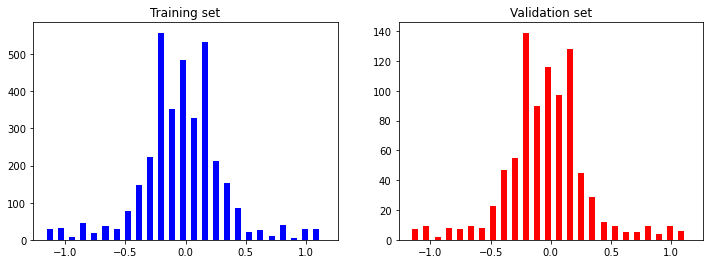

In [23]:
# Checking the train test normal distribution.

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes [0].hist (y_train, bins=num_bins, width=0.05, color='blue')
axes [0].set_title( 'Training set')
axes [1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes [1].set_title('Validation set')


Text(0.5, 1.0, 'Zoomed Image')

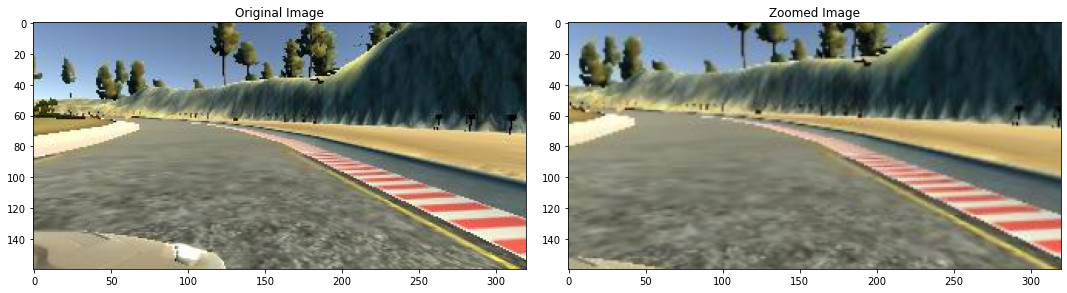

In [24]:
# Image augmentation is a technique used in image processing to artificially increase the size and diversity 
# of a dataset by applying various transformations to the original images. 
# This helps improve model robustness and generalization in computer vision tasks.

# Zoom Augmentation 
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom. augment_image (image)
  return image

image = image_paths[random.randint(0, 1000)]
original_image = mpimg. imread (image)
zoomed_1mage = zoom(original_image)

fig, axs = plt. subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_1mage)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

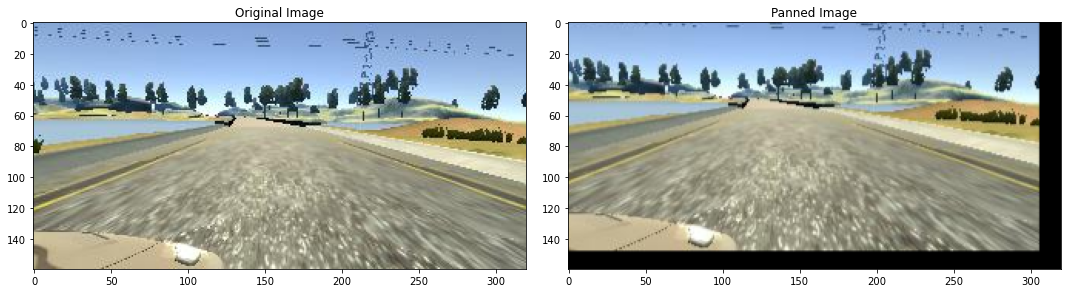

In [25]:
# Panning Augmentation 
def pan(image):

  pan = iaa. Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan. augment_image(image)
  return image

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt. subplots(1, 2, figsize=(15, 16))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title( 'Original Image')

axs[1].imshow(panned_image)
axs[1].set_title( 'Panned Image')

Text(0.5, 1.0, 'Brightness altered image')

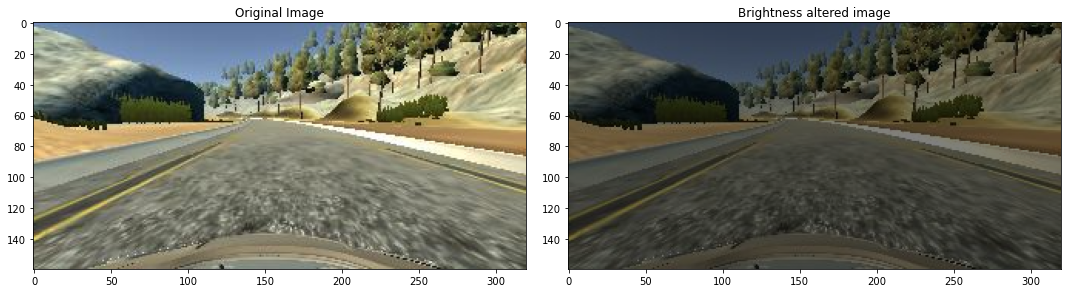

In [26]:
# random brightness Augmentation 
def img_random_brightness(image):

  brightness = iaa.Multiply((0.2, 1.2))

  image = brightness. augment_image(image)

  return image

image = image_paths[random. randint(0, 1000)]
original_image = mpimg. imread (image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt. subplots(1, 2, figsize=(15, 10))
fig. tight_layout()

axs[0].imshow(original_image)
axs[0].set_title( 'Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image')


Text(0.5, 1.0, 'Flipped Image -  Steering angle  0.08331793')

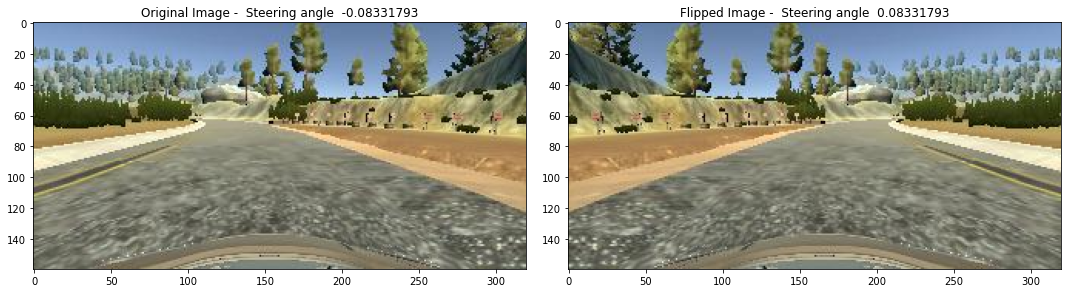

In [27]:
# random flip Augmentation 
def img_random_flip(image, steering_angle):

  image = cv2. flip(image,1)
  steering_angle = -steering_angle
  return image, steering_angle


random_index = random. randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt. subplots(1, 2, figsize=(15, 10))
fig. tight_layout()

axs[0].imshow(original_image)
axs[0].set_title( 'Original Image - '+' Steering angle  ' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - '+' Steering angle  ' + str(flipped_steering_angle))

In [28]:
# # random Augmentation 
def random_augment (image, steering_angle):

  image = mpimg.imread(image)

  if np. random.rand() < 0.5:
    image = pan (image)

  if np.random. rand() < 0.5:
    image = zoom(image)

  if np.random. rand() < 0.5:
    image = img_random_brightness(image)

  if np.random. rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)

  return image, steering_angle

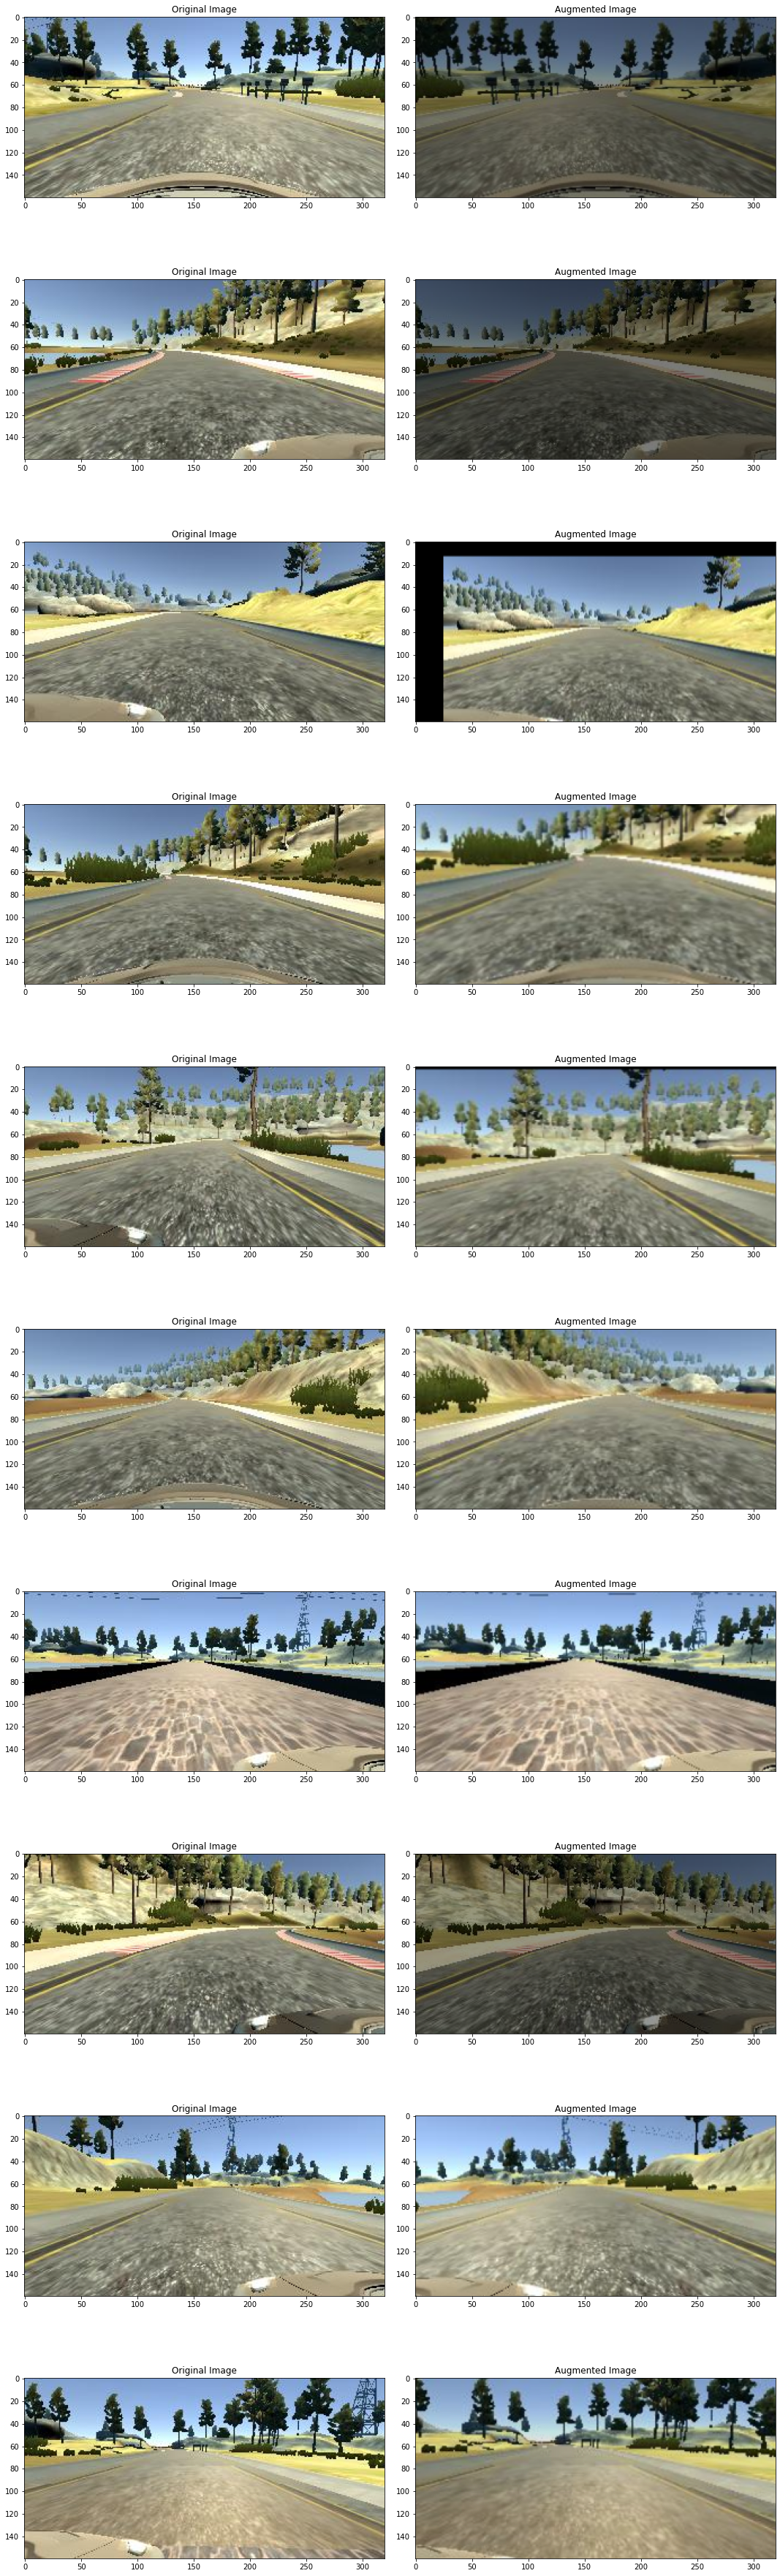

In [29]:
# top 10 augmented images.
ncol = 2
nrow = 10

fig, axs = plt. subplots(nrow, ncol, figsize=(15, 50))
fig. tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [30]:
# Image preprocessing function utilizing the YUV color and Gaussian Blur and resizing
def img_preprocess(img) :
  
  img = img[60:135, :,:]
  img = cv2. cvtColor(img, cv2. COLOR_RGB2YUV)
  img = cv2. GaussianBlur (img, (3, 3), 0)  # Gaussian blur
  img = cv2. resize(img, (200, 66))
  img = img/255

  return img

In [31]:
image = image_paths[100]
original_image = mpimg. imread (image)
preprocessed_image = img_preprocess(original_image)

Text(0.5, 1.0, 'Preprocessed Image')

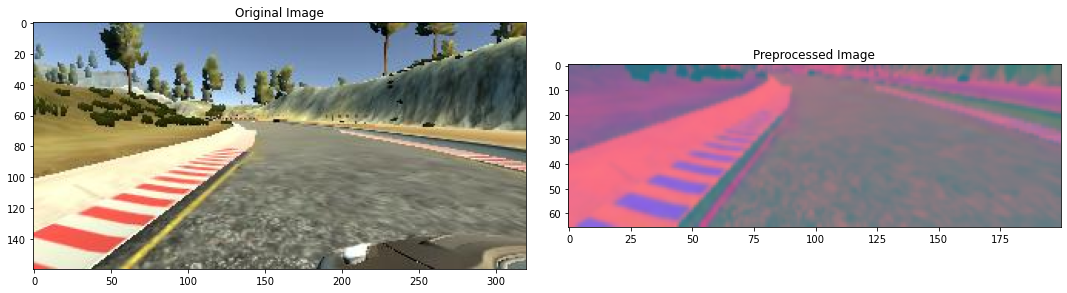

In [32]:
fig, axs = plt. subplots (1, 2, figsize=(15, 10))
fig.tight_layout ()

axs[0]. imshow(original_image)
axs[0].set_title( 'Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title( 'Preprocessed Image')

In [33]:
!nvidia-smi

Sat Dec 28 08:17:05 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Quadro RTX 6000                On  |   00000000:3B:00.0 Off |                    0 |
| N/A   59C    P0            202W /  250W |   21235MiB /  23040MiB |     99%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Inputs:

#### image_paths: List of file paths to the images.
#### steering_ang: List of steering angles corresponding to each image.
#### batch_size: Number of samples per batch.
#### istraining: Boolean indicating whether the data is being used for training or validation.

### Outputs:

#### Batches of preprocessed images and their corresponding steering angles.

### Process:

#### Training Mode (istraining=True):
#### Applies random augmentations (via random_augment) to simulate variations in driving conditions (e.g., brightness, rotation).
#### Validation Mode (istraining=False):
#### Reads and preprocesses the original images without applying augmentations.

In [34]:

def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random. randint(0, len(image_paths) - 1)
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
                                                                               
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)

    yield (np.asarray (batch_img), np. asarray(batch_steering))



In [35]:
x_train_gen, y_train_gen = next (batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next (batch_generator(X_valid, y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

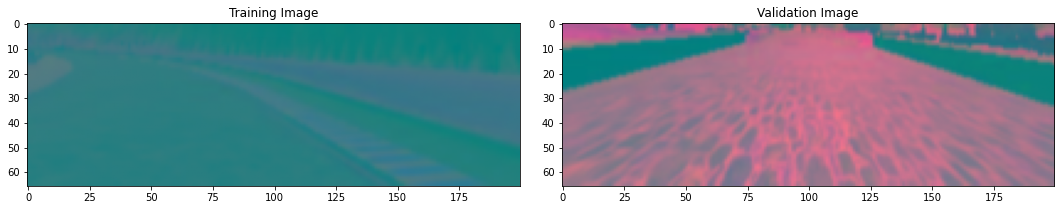

In [37]:
fig, axs = plt. subplots(1, 2, figsize=(15, 10))
fig. tight_layout ()

axs[0].imshow(x_train_gen[0])
axs[0].set_title( 'Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense
import tensorflow as tf

def nvidia_model():
    model = Sequential()

    # Convolutional layers with ELU activation
    model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(64, (5, 5), activation='elu'))
    # Uncomment the following line to add another Conv2D layer
    # model.add(Conv2D(64, (3, 3), activation='elu'))
    # model.add(Dropout(0.5))  # Dropout for regularization (optional)

    # Flatten the feature map
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(100, activation='elu'))
    # Uncomment the following line to add dropout for regularization
    # model.add(Dropout(0.5))
    
    model.add(Dense(50, activation='elu'))
    # Uncomment the following line to add dropout for regularization
    # model.add(Dropout(0.5))

    model.add(Dense(10, activation='elu'))
    # Uncomment the following line to add dropout for regularization
    # model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)

    return model

# Instantiate and summarize the model
model = nvidia_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 18, 64)         76864     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               115300    
                                                                 
 dense_7 (Dense)             (None, 50)                5

In [39]:
history = model.fit(
    batch_generator(X_train, y_train, 100, 1),
    steps_per_epoch=300,
    epochs=10,
    validation_data=batch_generator(X_valid, y_valid, 100, 0),
    validation_steps=200,
    verbose=1,
    shuffle=1
)


Epoch 1/10
300/300 [==============================] - 159s 527ms/step - loss: 0.1712 - val_loss: 0.0619
Epoch 2/10
300/300 [==============================] - 155s 520ms/step - loss: 0.0723 - val_loss: 0.0536
Epoch 3/10
300/300 [==============================] - 153s 511ms/step - loss: 0.0653 - val_loss: 0.0557
Epoch 4/10
300/300 [==============================] - 151s 505ms/step - loss: 0.0608 - val_loss: 0.0396
Epoch 5/10
300/300 [==============================] - 153s 511ms/step - loss: 0.0537 - val_loss: 0.0421
Epoch 6/10
300/300 [==============================] - 153s 512ms/step - loss: 0.0495 - val_loss: 0.0381
Epoch 7/10
300/300 [==============================] - 153s 513ms/step - loss: 0.0475 - val_loss: 0.0367
Epoch 8/10
300/300 [==============================] - 153s 513ms/step - loss: 0.0435 - val_loss: 0.0339
Epoch 9/10
300/300 [==============================] - 154s 516ms/step - loss: 0.0418 - val_loss: 0.0339
Epoch 10/10
300/300 [==============================] - 154s 516m

Text(0.5, 0, 'Epoch')

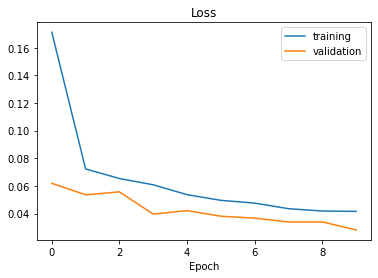

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')


In [42]:
model.save('model.h5')

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, LSTM, Reshape
import tensorflow as tf

def cnn_lstm_model():
    model = Sequential()

    # Convolutional layers with ELU activation
    model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(64, (5, 5), activation='elu'))

    # Flatten the feature map to prepare for LSTM
    model.add(Flatten())
    
    # Reshape the flattened output for LSTM layers
    model.add(Reshape((1, 1152)))  # Adjust the -1 to match your needs for LSTM
    
    # Add LSTM layer(s)
    model.add(LSTM(50, return_sequences=True, activation='elu'))
    model.add(LSTM(50, activation='elu'))

    # Fully connected layers
    model.add(Dense(100, activation='elu'))
    # Optional Dropout for regularization
    # model.add(Dropout(0.5))

    model.add(Dense(50, activation='elu'))
    # Optional Dropout for regularization
    # model.add(Dropout(0.5))

    model.add(Dense(10, activation='elu'))
    # Optional Dropout for regularization
    # model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)

    return model

# Instantiate and summarize the model
model = cnn_lstm_model()
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 18, 64)         76864     
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 reshape_1 (Reshape)         (None, 1, 1152)           0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)            

In [44]:
history = model.fit(
    batch_generator(X_train, y_train, 100, 1),
    steps_per_epoch=300,
    epochs=10,
    validation_data=batch_generator(X_valid, y_valid, 100, 0),
    validation_steps=200,
    verbose=1,
    shuffle=1
)


Epoch 1/10
300/300 [==============================] - 161s 527ms/step - loss: 0.0863 - val_loss: 0.0464
Epoch 2/10
300/300 [==============================] - 153s 512ms/step - loss: 0.0543 - val_loss: 0.0407
Epoch 3/10
300/300 [==============================] - 154s 516ms/step - loss: 0.0494 - val_loss: 0.0458
Epoch 4/10
300/300 [==============================] - 151s 504ms/step - loss: 0.0453 - val_loss: 0.0338
Epoch 5/10
300/300 [==============================] - 154s 514ms/step - loss: 0.0419 - val_loss: 0.0326
Epoch 6/10
300/300 [==============================] - 153s 512ms/step - loss: 0.0413 - val_loss: 0.0316
Epoch 7/10
300/300 [==============================] - 155s 519ms/step - loss: 0.0401 - val_loss: 0.0336
Epoch 8/10
300/300 [==============================] - 153s 511ms/step - loss: 0.0389 - val_loss: 0.0322
Epoch 9/10
300/300 [==============================] - 152s 510ms/step - loss: 0.0387 - val_loss: 0.0321
Epoch 10/10
300/300 [==============================] - 151s 505m

Text(0.5, 0, 'Epoch')

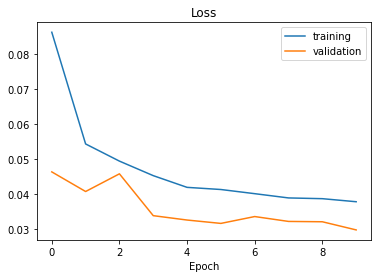

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, Flatten, Dense, Dropout, LayerNormalization, MultiHeadAttention, Dense, Reshape, Add, GlobalAveragePooling1D
)
import tensorflow as tf


def transformer_block(inputs, num_heads, key_dim, ff_dim, dropout_rate=0.1):
    """Defines a single Transformer encoder block."""
    # Multi-Head Attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    # Residual connection + Layer Normalization
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)

    # Feed-forward network
    ffn = Dense(ff_dim, activation="relu")(attention_output)
    ffn = Dense(inputs.shape[-1])(ffn)
    ffn = Dropout(dropout_rate)(ffn)

    # Residual connection + Layer Normalization
    transformer_output = Add()([attention_output, ffn])
    transformer_output = LayerNormalization(epsilon=1e-6)(transformer_output)

    return transformer_output


def cnn_transformer_model(input_shape=(66, 200, 3), num_heads=4, key_dim=64, ff_dim=256, dropout_rate=0.1):
    """CNN-Transformer Hybrid Model."""
    inputs = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(24, (5, 5), strides=(2, 2), activation="elu")(inputs)
    x = Conv2D(36, (5, 5), strides=(2, 2), activation="elu")(x)
    x = Conv2D(48, (5, 5), strides=(2, 2), activation="elu")(x)
    x = Conv2D(64, (5, 5), activation="elu")(x)

    # Flatten the feature maps
    feature_map_shape = tf.keras.backend.int_shape(x)[1:]  # Get the spatial dimensions
    flattened_dim = feature_map_shape[0] * feature_map_shape[1]
    x = Flatten()(x)
    x = Reshape((flattened_dim, feature_map_shape[2]))(x)  # Reshape into (timesteps, features)

    # Transformer layer
    x = transformer_block(x, num_heads=num_heads, key_dim=key_dim, ff_dim=ff_dim, dropout_rate=dropout_rate)

    # Pooling for sequence output
    x = GlobalAveragePooling1D()(x)

    # Fully connected layers
    x = Dense(100, activation="elu")(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(50, activation="elu")(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(10, activation="elu")(x)

    # Output layer
    outputs = Dense(1)(x)

    # Compile the model
    model = Model(inputs, outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss="mse")

    return model


# Instantiate and summarize the model
model = cnn_transformer_model()
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 66, 200, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 31, 98, 24)   1824        ['input_2[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 14, 47, 36)   21636       ['conv2d_12[0][0]']              
                                                                                                  
 conv2d_14 (Conv2D)             (None, 5, 22, 48)    43248       ['conv2d_13[0][0]']        

In [47]:
history = model.fit(
    batch_generator(X_train, y_train, 100, 1),
    steps_per_epoch=300,
    epochs=10,
    validation_data=batch_generator(X_valid, y_valid, 100, 0),
    validation_steps=200,
    verbose=1,
    shuffle=1
)


Epoch 1/10
300/300 [==============================] - 156s 513ms/step - loss: 0.1865 - val_loss: 0.1168
Epoch 2/10
300/300 [==============================] - 156s 523ms/step - loss: 0.1245 - val_loss: 0.1154
Epoch 3/10
300/300 [==============================] - 160s 534ms/step - loss: 0.1200 - val_loss: 0.1189
Epoch 4/10
300/300 [==============================] - 157s 525ms/step - loss: 0.1192 - val_loss: 0.1168
Epoch 5/10
300/300 [==============================] - 155s 518ms/step - loss: 0.1196 - val_loss: 0.1190
Epoch 6/10
300/300 [==============================] - 153s 512ms/step - loss: 0.1175 - val_loss: 0.1178
Epoch 7/10
300/300 [==============================] - 156s 520ms/step - loss: 0.1166 - val_loss: 0.1132
Epoch 8/10
300/300 [==============================] - 159s 530ms/step - loss: 0.1177 - val_loss: 0.1166
Epoch 9/10
300/300 [==============================] - 155s 517ms/step - loss: 0.1176 - val_loss: 0.1192
Epoch 10/10
300/300 [==============================] - 151s 505m

Text(0.5, 0, 'Epoch')

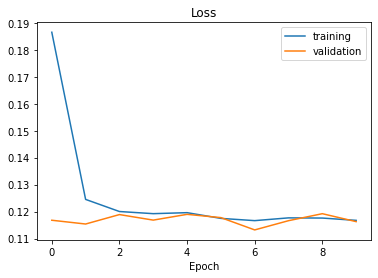

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')